<a href="https://colab.research.google.com/github/sooloin/LinearAlgebra2_assignment/blob/main/%EB%B6%93%EA%BD%83_%EB%B6%84%EB%A5%98_%EB%AC%B8%EC%A0%9C_202310878_%EC%A1%B0%EC%88%98%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive

In [2]:
from google.colab import files

files.upload()

Saving Iris.csv to Iris (2).csv


{'Iris (2).csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-seto

In [3]:
IrisSet = pd.read_csv('Iris.csv')
IrisSet

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# feature selection
X = IrisSet[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y_str = IrisSet['Species'].values

In [5]:
# labeling
encoder = LabelEncoder()
y = encoder.fit_transform(y_str)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 신경망 모델 정의
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # 가중치 초기화
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def forward(self, X):
        # 입력 레이어
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # 은닉 레이어
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backward(self, X, y, output):
        # 손실 함수의 기울기
        delta_loss = output - y

        # 출력 레이어의 오차
        delta_output = delta_loss * self.sigmoid_derivative(output)

        # 은닉 레이어의 오차
        delta_hidden = np.dot(delta_output, self.W2.T) * self.sigmoid_derivative(self.a1)

        # 가중치 업데이트
        self.W2 -= np.dot(self.a1.T, delta_output) * self.learning_rate
        self.b2 -= np.sum(delta_output, axis=0, keepdims=True) * self.learning_rate
        self.W1 -= np.dot(X.T, delta_hidden) * self.learning_rate
        self.b1 -= np.sum(delta_hidden, axis=0, keepdims=True) * self.learning_rate

    def one_hot_encode(self, y):
        m = len(y)
        n_classes = len(np.unique(y))
        one_hot = np.zeros((m, n_classes))
        one_hot[np.arange(m), y] = 1
        return one_hot

    def train(self, X, y, epochs):
        self.loss_arr = []
        self.accuracy_arr = []

        # 타깃 라벨을 원-핫 인코딩
        one_hot_y = self.one_hot_encode(y)

        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Backward pass
            self.backward(X, one_hot_y, output)

            # 손실 계산 및 기록
            loss = np.mean(np.square(one_hot_y - output))
            self.loss_arr.append(loss)

            # 정확도 계산 및 기록
            predictions = np.argmax(output, axis=1)
            accuracy = np.mean(predictions == y)
            self.accuracy_arr.append(accuracy)

            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {accuracy}')

    def predict(self, X):
        output = self.forward(X)
        predictions = np.argmax(output, axis=1)
        return predictions

In [8]:
# 신경망 모델 초기화
input_size = X_train.shape[1]
hidden_size = 10
output_size = len(np.unique(y))
model = NeuralNetwork(input_size, hidden_size, output_size)

In [9]:
# 신경망 모델 훈련
epochs = 1000
model.train(X_train, y_train, epochs)

Epoch 1/1000, Loss: 0.4423408245314914, Accuracy: 0.3333333333333333
Epoch 2/1000, Loss: 0.4035955904789139, Accuracy: 0.3333333333333333
Epoch 3/1000, Loss: 0.3505772397561086, Accuracy: 0.3333333333333333
Epoch 4/1000, Loss: 0.2733935964021483, Accuracy: 0.36666666666666664
Epoch 5/1000, Loss: 0.21434409427874687, Accuracy: 0.6583333333333333
Epoch 6/1000, Loss: 0.19554212921700412, Accuracy: 0.6583333333333333
Epoch 7/1000, Loss: 0.18770945383584065, Accuracy: 0.6583333333333333
Epoch 8/1000, Loss: 0.18229492072227724, Accuracy: 0.6583333333333333
Epoch 9/1000, Loss: 0.17797217139264088, Accuracy: 0.6583333333333333
Epoch 10/1000, Loss: 0.1743238261482277, Accuracy: 0.6666666666666666
Epoch 11/1000, Loss: 0.17111507324180428, Accuracy: 0.6833333333333333
Epoch 12/1000, Loss: 0.16819900515568176, Accuracy: 0.7166666666666667
Epoch 13/1000, Loss: 0.16548811024614474, Accuracy: 0.7666666666666667
Epoch 14/1000, Loss: 0.16293100928086257, Accuracy: 0.8
Epoch 15/1000, Loss: 0.16049695387

In [10]:
# 테스트 데이터로 예측
predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9666666666666667


In [11]:
print(len(model.loss_arr))  # 손실 값의 길이 확인
print(len(model.accuracy_arr))  # 정확도 값의 길이 확인


1000
1000


In [12]:
print("손실 배열 길이:", len(model.loss_arr))
print("정확도 배열 길이:", len(model.accuracy_arr))


손실 배열 길이: 1000
정확도 배열 길이: 1000


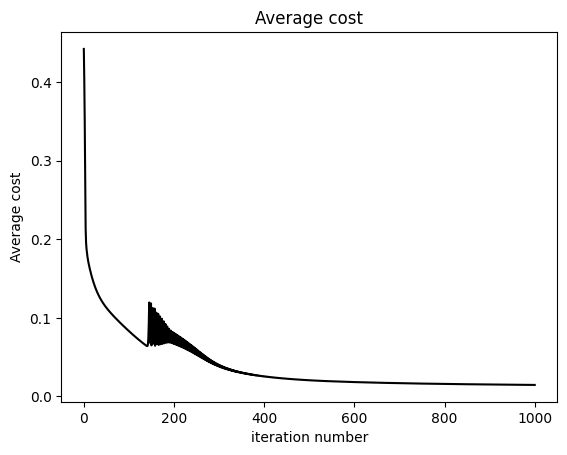

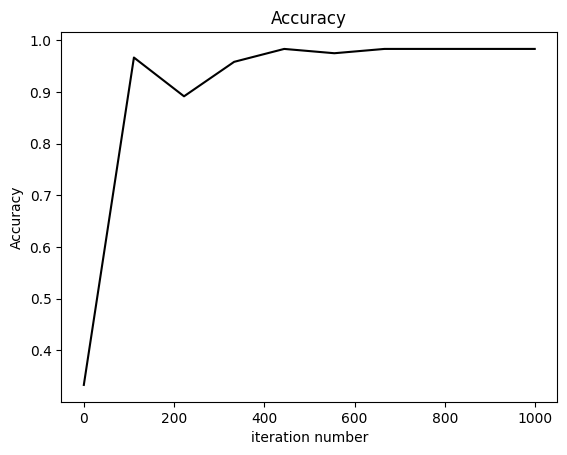

In [13]:
# 손실 그래프 출력
# plt.plot(np.arange(0, epochs + 1, epochs // 9), model.loss_arr[::epochs // 9], 'k')
# plt.ylabel('Average cost')
# plt.xlabel('iteration number')
# plt.title('Average cost')

plt.plot(np.arange(0, epochs + 1), np.concatenate([model.loss_arr, [model.loss_arr[-1]]]), 'k')
plt.ylabel('Average cost')
plt.xlabel('iteration number')
plt.title('Average cost')


# # y 축 범위 설정
# plt.ylim(0, 1.4)

# # y 축 눈금 설정
# plt.yticks(np.arange(0, 1.5, 0.2))

plt.show()

# 정확도 그래프 출력
plt.plot(np.arange(0, epochs + 1, epochs // 9), model.accuracy_arr[::epochs // 9], 'k')
plt.ylabel('Accuracy')
plt.xlabel('iteration number')
plt.title('Accuracy')

# # y 축 범위 설정
# plt.ylim(0, 100)

# # y 축 눈금 설정
# plt.yticks(np.arange(40, 110, 10))

plt.show()
